In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\roysi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# reading the dataset
mobile_df = pd.read_csv('Flipkart Mobile - 2.csv')
mobile_df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
# Inspecting rows and column present in the dataset
mobile_df.shape

(430, 16)

In [5]:
# Gathering informationn about the dataset
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

From the above info about the dataset it can be seen that the dataframe has no null values present. However to verify we can check

In [6]:
# NULL value check
mobile_df.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

**Duplicated Values**

In [7]:
# Duplicate value check 
mobile_df[mobile_df.duplicated()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales


No duplicate values are present

## Data Analysis and Visualization

In [8]:
mobile_df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


The dataset is divided into two values:
- **Continious Values**
- **Categorical Values**

Let's analyse the ***continous values*** first

In [9]:
# descriptive statistics of the continious columns

mobile_df.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


So it can be seen that some mobile phone is of 7.6 inches display, and the costliest mobile is of 157999/-, while some mobile variant recorded 550.199 cr sales, amazing statistics!!

- **`ROM`**: Read Only Memory

In [10]:
# Mobile Model(s) with least ROM

mobile_df[mobile_df.ROM == mobile_df.ROM.min()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
326,Samsung,Galaxy Grand 2,Gold,Qualcomm,Small,8,1,5.2,1,1,2600,4.1,2343,15999,0.04,3.75
335,Samsung,Galaxy Grand 2,Black,Qualcomm,Small,8,1,5.2,1,1,2600,4.1,2343,15999,0.04,3.75


In [11]:
# Mobile Model(s) with highest ROM

mobile_df[mobile_df.ROM == mobile_df.ROM.max()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
309,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,512,12,7.6,3,1,4400,4.4,7,157999,0.12,0.11


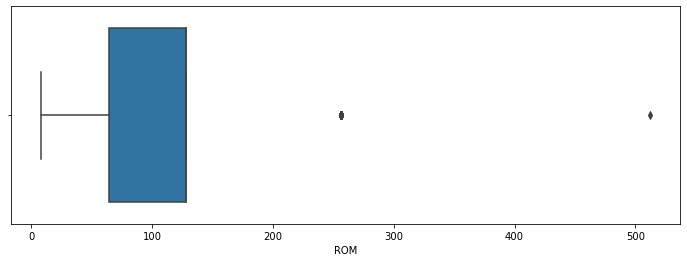

In [12]:
# Spread of ROM among mobiles models

plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.ROM)
plt.show()

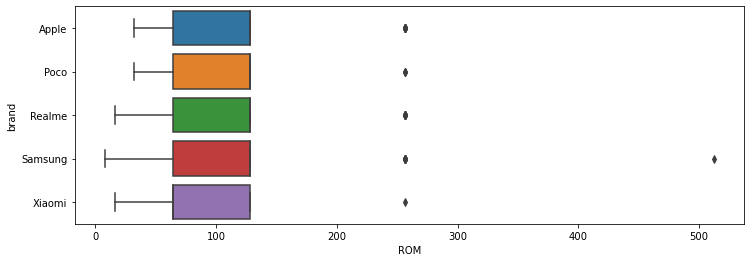

In [13]:
# ROM placed among various brands

plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.ROM, mobile_df.brand)
plt.show()

From the above boxplot it can be seen that Samsung has the widest range of ROM selection.

- **`RAM`**: Random Access Memory

In [14]:
# Mobile Model(s) with least RAM

mobile_df[mobile_df.RAM == mobile_df.RAM.min()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
326,Samsung,Galaxy Grand 2,Gold,Qualcomm,Small,8,1,5.2,1,1,2600,4.1,2343,15999,0.04,3.75
335,Samsung,Galaxy Grand 2,Black,Qualcomm,Small,8,1,5.2,1,1,2600,4.1,2343,15999,0.04,3.75


In [15]:
# Mobile Model(s) with highest RAM

mobile_df[mobile_df.RAM == mobile_df.RAM.max()].sort_values(by = 'sales_price')

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
173,Realme,X7 Max,Black,MediaTek,Medium,256,12,6.4,3,1,4500,4.3,1282,30149,0.08,3.87
174,Realme,X7 Max,Others,MediaTek,Medium,256,12,6.4,3,1,4500,4.3,1282,30149,0.08,3.87
176,Realme,X7 Max,Silver,MediaTek,Medium,256,12,6.4,3,1,4500,4.3,1282,30149,0.08,3.87
200,Realme,X3 SuperZoom,Blue,Qualcomm,Large,256,12,6.6,4,2,4200,4.2,459,32999,0.05,1.51
201,Realme,X3 SuperZoom,White,Qualcomm,Large,256,12,6.6,4,2,4200,4.2,459,32999,0.05,1.51
194,Realme,GT 5G,Yellow,Qualcomm,Medium,256,12,6.4,3,1,4500,4.3,81,41999,0.04,0.34
319,Samsung,Galaxy Note 20 Ultra 5G,Bronze,Exynos,Large,256,12,6.9,3,1,4500,4.5,110,91999,0.20,1.01
330,Samsung,Galaxy Note 20 Ultra 5G,Black,Exynos,Large,256,12,6.9,3,1,4500,4.5,110,91999,0.20,1.01
303,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,256,12,7.6,3,1,4400,4.4,7,149999,0.12,0.10
310,Samsung,Galaxy Z Fold3 5G,Green,Qualcomm,Very Large,256,12,7.6,3,1,4400,4.4,7,149999,0.12,0.10


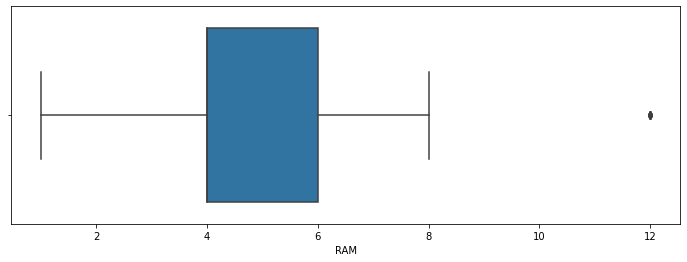

In [16]:
# Spread of RAM among mobiles models

plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.RAM)
plt.show()

The powerful phone has 12GB RAM.

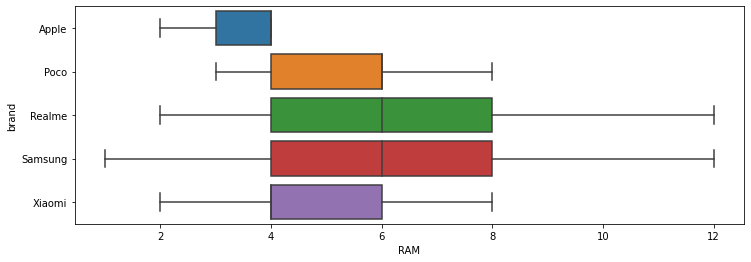

In [17]:
# RAM placed among various brands

plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.RAM, mobile_df.brand)
plt.show()

Realme and Samsung provides the most powerful phone, while Apple provides the least powerful phone, whereas Poco and Xiaomi provides the average phone.

- **`display_size`**

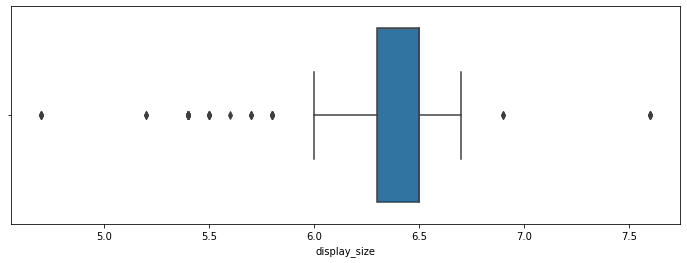

In [18]:
# Range of display_size used among mobile models

plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.display_size)
plt.show()

The smallest display is of 4.7 inches and largest display is above 7.5 inches huges phone maybe foldable.Let's check out

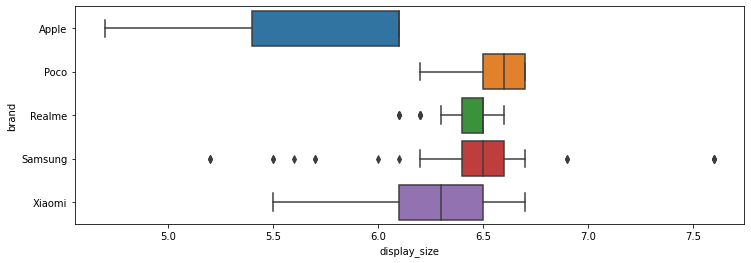

In [19]:
# Range of display_size used among mobile brands

plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.display_size, mobile_df.brand)
plt.show()

So the largest phone is made by Samsung

In [67]:
# Mobile Models having the smallest display_size

mobile_df[mobile_df.display_size == mobile_df.display_size.min()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
0,Apple,iPhone SE,Black,iOS,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
2,Apple,iPhone SE,Red,iOS,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
35,Apple,iPhone SE,White,iOS,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
42,Apple,iPhone 8,Gold,iOS,Very Small,64,2,4.7,1,1,1800,4.5,11281,38999,0.02,43.99


iphone SE, and iPhone 8 are smallest phones.

In [21]:
# Mobile Models having the largest display_size


mobile_df[mobile_df.display_size == mobile_df.display_size.max()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
303,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,256,12,7.6,3,1,4400,4.4,7,149999,0.12,0.10
309,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,512,12,7.6,3,1,4400,4.4,7,157999,0.12,0.11
310,Samsung,Galaxy Z Fold3 5G,Green,Qualcomm,Very Large,256,12,7.6,3,1,4400,4.4,7,149999,0.12,0.10
328,Samsung,Galaxy Fold 2,Bronze,Qualcomm,Very Large,256,12,7.6,3,3,4500,3.0,10,149999,0.21,0.15


Whereas the largest phone are all foldable phone made by Samsung of the Galaxy Series.

- **`battery_capacity`**

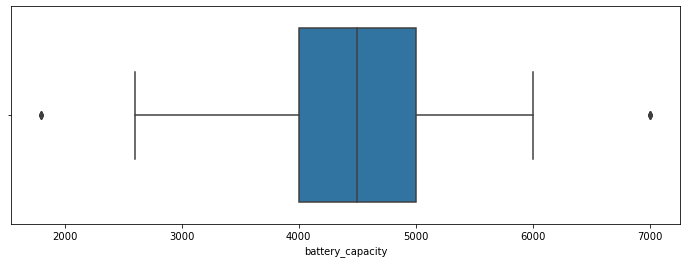

In [22]:
# Spread of battery capacity amongs various mobile models

plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.battery_capacity)

plt.show()

In [68]:
# Mobile with highest battery range

mobile_df[mobile_df.battery_capacity == mobile_df.battery_capacity.max()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
278,Samsung,Galaxy F62,Gray,Exynos,Large,128,6,6.7,4,1,7000,4.2,9721,23999,0.20,23.33
284,Samsung,Galaxy F62,Green,Exynos,Large,128,6,6.7,4,1,7000,4.2,9721,23999,0.20,23.33
287,Samsung,Galaxy F62,Blue,Exynos,Large,128,6,6.7,4,1,7000,4.2,9721,23999,0.20,23.33
340,Samsung,Galaxy F62,Blue,Exynos,Large,128,8,6.7,4,1,7000,4.3,4746,25999,0.18,12.34
351,Samsung,Galaxy F62,Gray,Exynos,Large,128,8,6.7,4,1,7000,4.3,4746,25999,0.18,12.34
359,Samsung,Galaxy F62,Green,Exynos,Large,128,8,6.7,4,1,7000,4.3,4746,25999,0.18,12.34


Samsung provides the best battery in house.

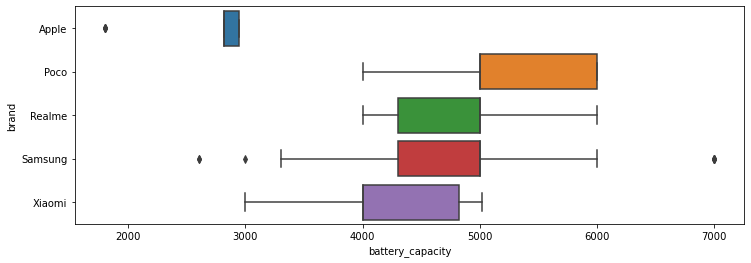

In [23]:
# # Spread of battery capacity amongs various mobile brands
 

plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.battery_capacity,mobile_df.brand )

plt.show()

Samsung has the highest battery capacity whereas Apple has the least battery capacity in terms of other brands.

In [24]:
mobile_df[mobile_df.battery_capacity == mobile_df.battery_capacity.min()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
35,Apple,iPhone SE,White,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
42,Apple,iPhone 8,Gold,iOS,Very Small,64,2,4.7,1,1,1800,4.5,11281,38999,0.02,43.99
43,Apple,iPhone 7 Plus,Black,iOS,Small,32,2,5.5,2,1,1800,4.5,29713,36999,0.02,109.94


- **`ratings`**

In [26]:
mobile_df.ratings.describe()

count    430.000000
mean       4.339302
std        0.151494
min        3.000000
25%        4.300000
50%        4.300000
75%        4.400000
max        4.600000
Name: ratings, dtype: float64

So from the descriptive statistics it can be identified that the ratings are out of 5.

In [70]:
# Most highest rated phone
mobile_df[mobile_df.ratings == mobile_df.ratings.max()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,iOS,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
5,Apple,iPhone 12,Blue,iOS,Medium,64,4,6.1,2,1,2815,4.6,745,64149,0.02,4.78
6,Apple,iPhone 12,White,iOS,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
7,Apple,iPhone 12,Green,iOS,Medium,64,4,6.1,2,1,2815,4.6,745,64149,0.02,4.78
8,Apple,iPhone 12,Blue,iOS,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
9,Apple,iPhone 12,Black,iOS,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
11,Apple,iPhone 12,Green,iOS,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
13,Apple,iPhone 12,Blue,iOS,Medium,256,4,6.1,2,1,2815,4.6,745,79149,0.02,5.90
15,Apple,iPhone XR,White,iOS,Medium,128,3,6.1,1,1,2942,4.6,5366,47999,0.09,25.76


In [69]:
# Most low rated phone
mobile_df[mobile_df.ratings == mobile_df.ratings.min()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
328,Samsung,Galaxy Fold 2,Bronze,Qualcomm,Very Large,256,12,7.6,3,3,4500,3.0,10,149999,0.21,0.15


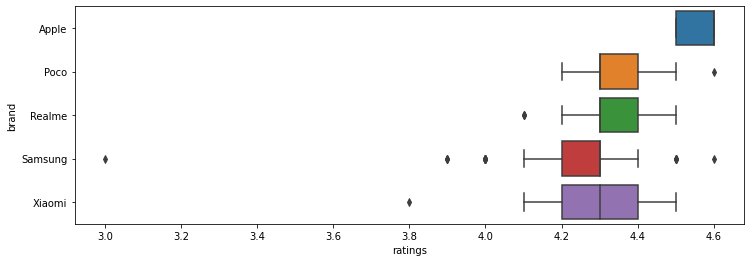

In [29]:
plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.ratings, mobile_df.brand)

plt.show()

Apple is the most trusted company by all of the people.

- **num_of_ratings**

In [30]:
mobile_df.groupby(by = 'brand')['num_of_ratings'].mean().sort_values()

brand
Apple       4822.964286
Samsung     6984.798319
Realme     29227.181159
Poco       32285.410714
Xiaomi     52321.393443
Name: num_of_ratings, dtype: float64

Xiomi has the highest number of ratings, which can be beleived that Xiaomi, phones are the most affordable phones in the markets, whereas Apple phones which are costly are purchased by less number of poeple and also rated least.

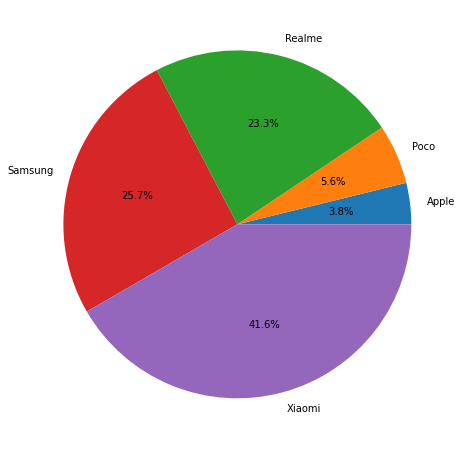

In [31]:
plt.figure(figsize = (8, 8))
plt.pie(mobile_df.groupby(by = 'brand')['num_of_ratings'].mean().sort_values(), 
       labels = mobile_df.groupby(by = 'brand')['num_of_ratings'].mean().index,
        autopct = '%1.01f%%')

plt.show()

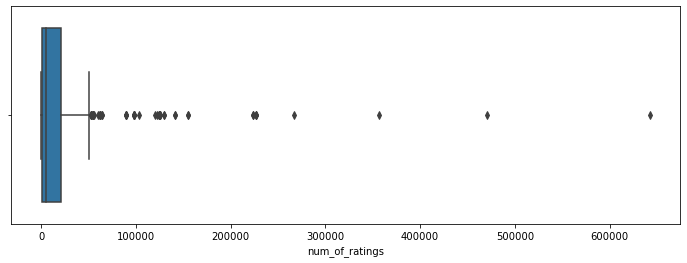

In [32]:
plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.num_of_ratings)
plt.show()

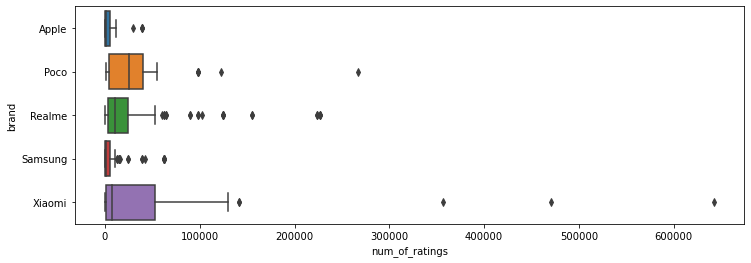

In [33]:
plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.num_of_ratings, mobile_df.brand)
plt.show()

**Xiaomi** has the highest reviewed phones

- **`sales_price`**

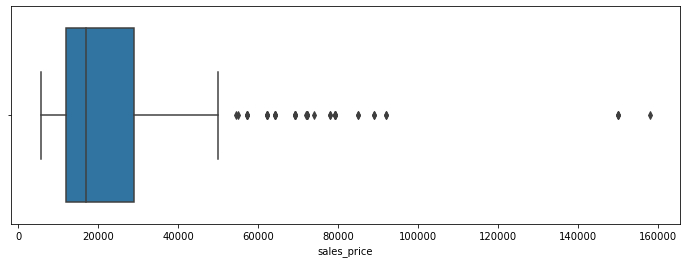

In [34]:
plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.sales_price)
plt.show()

Let's find out the most affordable phone

In [35]:
mobile_df[mobile_df.sales_price == mobile_df.sales_price.min()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
419,Xiaomi,Redmi 6A,Gold,MediaTek,Small,32,2,5.5,1,1,3000,4.3,55708,5742,0.28,31.99


Most expensive phone in the market

In [36]:
mobile_df[mobile_df.sales_price == mobile_df.sales_price.max()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
309,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,512,12,7.6,3,1,4400,4.4,7,157999,0.12,0.11


Most Expensive and Least Expensive brands

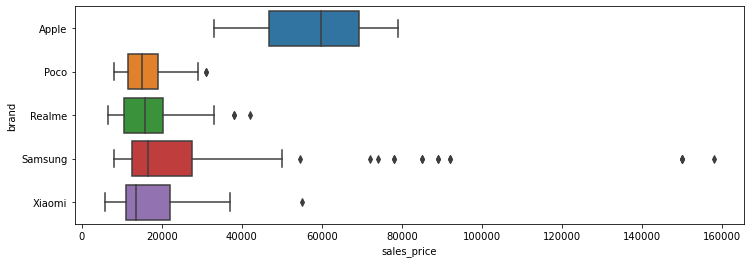

In [37]:
plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df.sales_price, mobile_df.brand)
plt.show()

Xiomi is the most affordable brand, whereas Samsung has budget phones as well as high end phones too, but Apple's phone are little expensive than the average crowd.

- **`sales(in_cr)`**: As the data dictionary says these are sale values in crores, so let's rename the column

In [38]:
mobile_df.rename(columns = {'sales': 'sales(in_cr)'}, inplace = True)

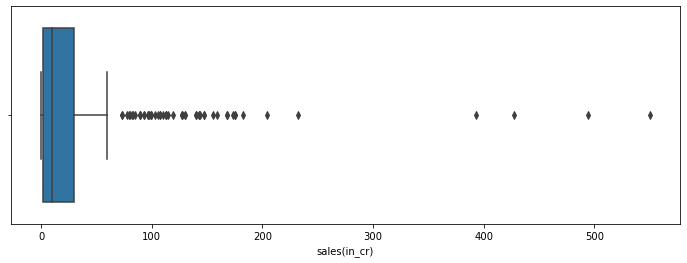

In [39]:
plt.figure(figsize = (12, 4))
sns.boxplot(mobile_df['sales(in_cr)'])

plt.show()

Company which has the highest and least sales

In [40]:
round(mobile_df.groupby(by = ['brand'])['sales(in_cr)'].mean().sort_values(), 2)

brand
Samsung    10.60
Apple      19.49
Realme     31.17
Poco       43.52
Xiaomi     60.67
Name: sales(in_cr), dtype: float64

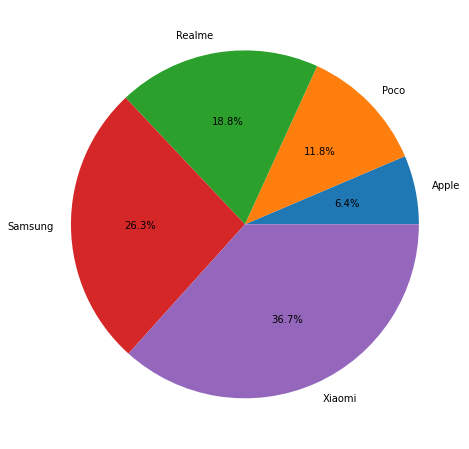

In [41]:
plt.figure(figsize = (8, 8))
plt.pie(mobile_df.groupby(by = ['brand'])['sales(in_cr)'].mean().sort_values(), 
       labels = mobile_df.groupby(by = ['brand'])['sales(in_cr)'].mean().index, 
        autopct = '%1.01f%%')

plt.show()

Xiomi has a 6 times more market share compared to Apple which Apple which stands at 6.4% percentage.

As we have completed our analysis on the continious variables, lets understand which of the factors influences more for a mobile purchase

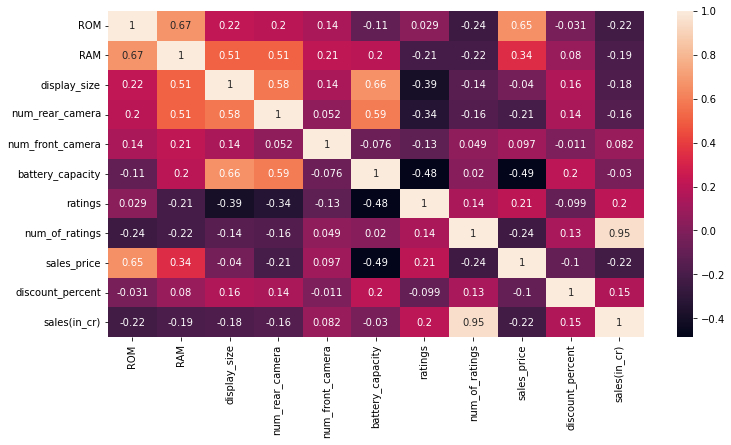

In [42]:
plt.figure(figsize = (12, 6))

sns.heatmap(mobile_df.corr(), annot = True)

plt.show()

From the above sales_in(in_cr) is most affected by the num_of_ratings and least affected by the num_front_camera, and highest negetively correlated with ROM and sales_price.

Also as RAM of mobile increases then price of the increases.

**Mobile Price compared to Mobile Sale including RAM provided**

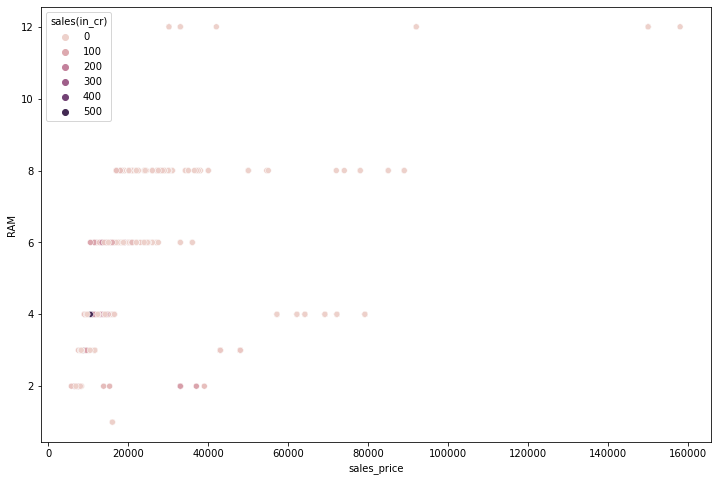

In [77]:
plt.figure(figsize = (12, 8))
sns.scatterplot(mobile_df['sales_price'], mobile_df['RAM'], hue = mobile_df['sales(in_cr)'], alpha = 1)

plt.show()

4 GB phones have the highest sales value whereas as 6GB and 8GB RAM phones are also best selling

**The least and most discounted phone**

In [78]:
# most discounted phone
mobile_df[mobile_df.discount_percent == mobile_df.discount_percent.max()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
332,Samsung,Galaxy J6,Blue,Exynos,Small,64,4,5.6,1,1,3000,4.5,42278,9490,0.44,40.12


In [45]:
# least discounted phone
mobile_df[mobile_df.discount_percent == mobile_df.discount_percent.min()].sort_values(by = 'sales(in_cr)', ascending = False)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
398,Xiaomi,Redmi Note 7 Pro,Blue,Qualcomm,Medium,128,6,6.3,2,1,4000,4.4,53013,15649,0.01,82.96
333,Samsung,Galaxy J7 - 6,Others,Exynos,Small,16,2,5.5,1,1,3300,4.3,38916,15299,0.01,59.54
270,Samsung,Galaxy M31,Black,Others,Medium,128,6,6.4,4,1,6000,4.3,5029,17599,0.01,8.85
378,Xiaomi,Mi 10i,Black,Qualcomm,Large,128,6,6.7,4,1,4820,4.3,1216,23949,0.01,2.91
314,Samsung,Galaxy A21s,Black,Exynos,Large,64,6,6.5,4,1,5000,4.2,1143,15199,0.01,1.74
271,Samsung,Galaxy M31,Blue,Others,Medium,128,8,6.4,4,1,6000,4.3,857,18666,0.01,1.60
403,Xiaomi,Redmi Note 9 Pro,Gold,Qualcomm,Large,128,6,6.7,4,1,5020,4.3,434,18778,0.01,0.81
324,Samsung,Galaxy M02,Red,MediaTek,Large,32,3,6.5,2,1,5000,4.0,322,8083,0.01,0.26
257,Samsung,Galaxy M02,Blue,MediaTek,Large,32,2,6.5,2,1,5000,4.0,213,8278,0.01,0.18
266,Samsung,Galaxy M02,Black,MediaTek,Large,32,2,6.5,2,1,5000,4.0,213,8238,0.01,0.18


So it can be be assured that Samsung and Xiaomi make flagship affordable smart phones

**Categorical Variables**

- **brands**

In [46]:
# unique brands present

mobile_df.brand.unique()

array(['Apple', 'Poco', 'Realme', 'Samsung', 'Xiaomi'], dtype=object)

In [47]:
# Which mobile has the highest variant
mobile_df.brand.value_counts()

Realme     138
Samsung    119
Xiaomi      61
Apple       56
Poco        56
Name: brand, dtype: int64

In [86]:
mobile_df[mobile_df.brand == "Poco"]['model'].unique().shape

(11,)

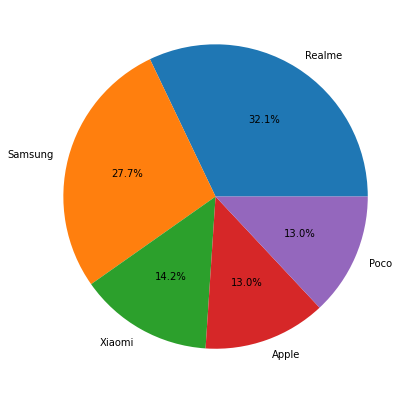

In [48]:
plt.figure(figsize = (7, 7))
plt.pie(mobile_df.brand.value_counts(), labels = mobile_df.brand.value_counts().index, autopct = '%1.01f%%')
plt.show()

- **Model** 

Models which have wide range of colour to offer

In [49]:
mobile_df.groupby(by = ['brand','model'])['base_color'].count().sort_values(ascending = False).head()

brand   model            
Apple   iPhone XR            18
        iPhone 12            17
        iPhone 12 Mini       16
Poco    M2 Pro                9
Realme  GT Master Edition     9
Name: base_color, dtype: int64

In [103]:
mobile_df.base_color.value_counts().shape

(12,)

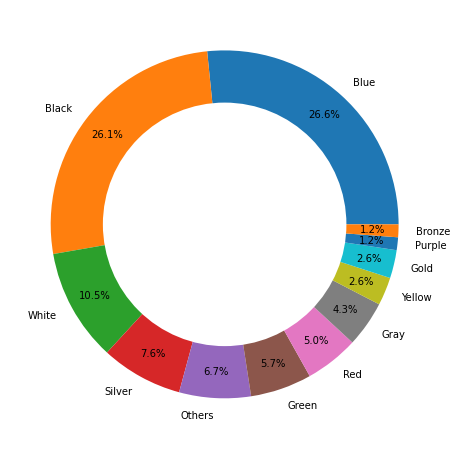

In [112]:
# explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05 )


plt.figure(figsize = (8, 8))
plt.pie(mobile_df.base_color.value_counts(), labels=mobile_df.base_color.value_counts().index,
        autopct='%1.1f%%', pctdistance=0.85)

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.show()

In [50]:

mobile_df[mobile_df.model == 'iPhone XR']

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
15,Apple,iPhone XR,White,Water,Medium,128,3,6.1,1,1,2942,4.6,5366,47999,0.09,25.76
21,Apple,iPhone XR,Yellow,Water,Medium,128,3,6.1,1,1,2942,4.6,5366,47999,0.09,25.76
24,Apple,iPhone XR,Others,iOS,Medium,128,3,6.1,1,1,2942,4.6,5366,47999,0.09,25.76
25,Apple,iPhone XR,Black,Water,Medium,128,3,6.1,1,1,2942,4.6,5366,47999,0.09,25.76
27,Apple,iPhone XR,Others,Water,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
29,Apple,iPhone XR,Others,Water,Medium,128,3,6.1,1,1,2942,4.6,5366,47999,0.09,25.76
33,Apple,iPhone XR,Black,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
44,Apple,iPhone XR,Black,iOS,Medium,128,3,6.1,1,1,2942,4.6,5366,47999,0.09,25.76
45,Apple,iPhone XR,White,iOS,Medium,128,3,6.1,1,1,2942,4.6,5366,47999,0.09,25.76


Lets check the processor as there are some processor named as Ceramic and Water and other

- **Ceramic processors**

In [51]:
mobile_df.processor.value_counts()

Qualcomm    168
MediaTek    144
Exynos       53
Ceramic      33
iOS          12
Water        11
Others        9
Name: processor, dtype: int64

Lets analyse the Ceramic processor

In [52]:
mobile_df[mobile_df.processor == 'Ceramic']

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
5,Apple,iPhone 12,Blue,Ceramic,Medium,64,4,6.1,2,1,2815,4.6,745,64149,0.02,4.78
6,Apple,iPhone 12,White,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
7,Apple,iPhone 12,Green,Ceramic,Medium,64,4,6.1,2,1,2815,4.6,745,64149,0.02,4.78
8,Apple,iPhone 12,Blue,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
9,Apple,iPhone 12,Black,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
10,Apple,iPhone 12 Mini,Black,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
11,Apple,iPhone 12,Green,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
12,Apple,iPhone 12 Mini,White,Ceramic,Small,128,4,5.4,2,1,2815,4.5,244,62149,0.04,1.52


These are all iphones which should be of iOS processors

In [53]:
mobile_df.model[mobile_df.processor == 'Ceramic'].value_counts()

iPhone 12         17
iPhone 12 Mini    16
Name: model, dtype: int64

In [54]:
mobile_df.loc[mobile_df.processor == 'Ceramic', 'processor'] = 'iOS'

- **Water Processors**

In [55]:
mobile_df.model[mobile_df.processor == 'Water'].value_counts()

iPhone XR    8
iPhone SE    3
Name: model, dtype: int64

In [56]:
mobile_df.loc[mobile_df.processor == 'Water', 'processor'] = 'iOS'

- **other** processors

In [57]:
mobile_df.model[mobile_df.processor == 'Others'].value_counts()

C11 2021      4
C21Y          2
Galaxy M31    2
Galaxy A7     1
Name: model, dtype: int64

Dropping the other processors rows

In [58]:
mobile_df = mobile_df[~(mobile_df.processor == 'Others')]

In [59]:
mobile_df.processor.value_counts() 

Qualcomm    168
MediaTek    144
iOS          56
Exynos       53
Name: processor, dtype: int64

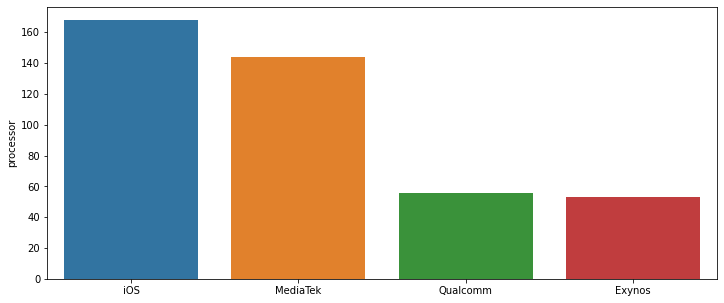

In [60]:
plt.figure(figsize = (12, 5))
sns.barplot(x = mobile_df.processor.unique(), y = mobile_df.processor.value_counts() )

plt.show()

iOS processors have wider variety

- **screen_size**

In [61]:
mobile_df.display_size.dtype

dtype('float64')

In [62]:
mobile_df.display_size = mobile_df.display_size.astype('str')

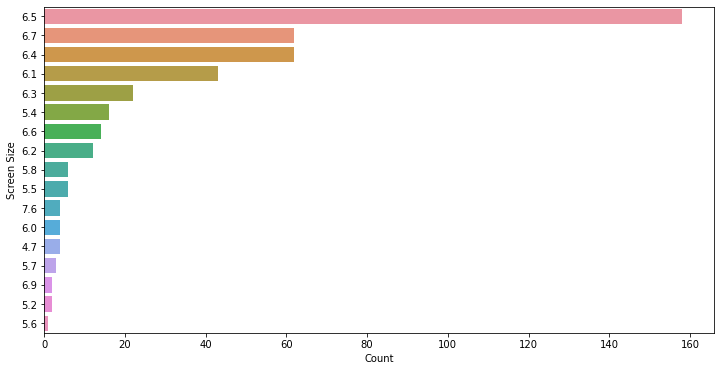

In [63]:
plt.figure(figsize = (12, 6))
sns.barplot(x = mobile_df.display_size.value_counts(), y = mobile_df.display_size.value_counts().index)

plt.xlabel("Count")
plt.ylabel('Screen Size')

plt.show()

In [116]:
mobile_df.groupby(by = ['display_size'])['sales_price'].mean().sort_values()

display_size
5.7      8396.000000
5.6      9490.000000
5.8     10197.500000
6.0     11849.500000
6.3     13914.136364
6.5     14996.537975
5.5     15149.166667
5.2     15999.000000
6.2     16381.583333
6.4     21212.112903
6.6     26248.000000
6.7     30864.000000
4.7     34499.000000
6.1     49673.953488
5.4     64336.500000
6.9     91999.000000
7.6    151999.000000
Name: sales_price, dtype: float64

- **num_rear_camera**

In [64]:
mobile_df.num_rear_camera.value_counts()

3    154
4    134
2     97
1     36
Name: num_rear_camera, dtype: int64

Most number of camera preferred by people are 3 in a phone.

- **num_front_camera**

In [65]:
mobile_df.num_front_camera.value_counts()

1    404
2     15
3      2
Name: num_front_camera, dtype: int64

In [66]:
# Lets check out the phone which has 3 front camera

mobile_df[mobile_df.num_front_camera == 3]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
328,Samsung,Galaxy Fold 2,Bronze,Qualcomm,Very Large,256,12,7.6,3,3,4500,3.0,10,149999,0.21,0.15
350,Samsung,Galaxy A80,Gold,Qualcomm,Large,128,8,6.7,2,3,3700,4.4,5393,28490,0.14,15.36


In [87]:
mobile_df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales(in_cr)
0,Apple,iPhone SE,Black,iOS,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,iOS,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,iOS,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,iOS,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


So now as we have inspected the entire wise please check out the inference report for the business problem.